In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## EDA & FE

타겟변수 확인

In [8]:
target = train['count']

In [9]:
from scipy import stats
from scipy.stats import norm

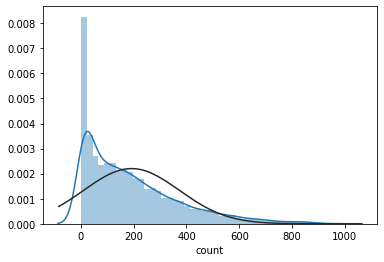

In [10]:
sns.distplot(train['count'],fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (169.82942673231383, 191.5741319125482, 0.9372682766213174))

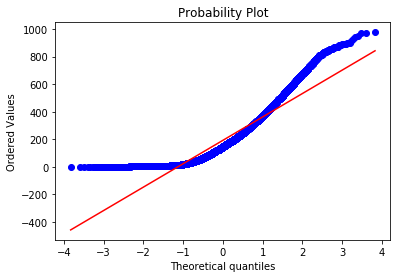

In [11]:
stats.probplot(train['count'], plot = plt)

왼쪽으로 치우친 형태를 보이고 있으므로 멱변환이 필요할거 같다.
또한 PP플롯을 확인해 본 결과 정규성을 띄지 않으므로 박스칵스 변환을 한다.

In [12]:
train["log_count"] = np.log(target+1)

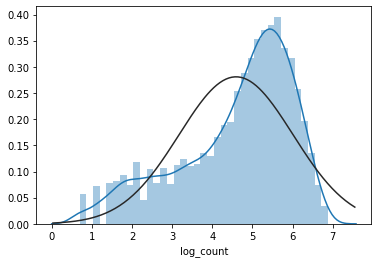

In [13]:
sns.distplot(train["log_count"], fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.3647396459244168, 4.591363690454027, 0.9611793780126955))

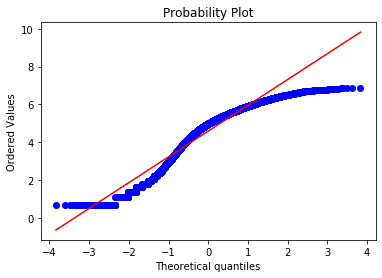

In [14]:
stats.probplot(train["log_count"], plot = plt)

박스칵스 변환 후에 왜도편중을 조금이나마 줄인거같다,.

In [15]:
feature_names=list(test)
df_train=train[feature_names]
df=pd.concat((df_train, test))

In [16]:
print(train.shape, test.shape, df.shape)

(10886, 13) (6493, 9) (17379, 9)


데이터 전처리를 편리하게 하기 위해서 train데이터와 test 데이터를 합쳤다.


In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 9 columns):
datetime      17379 non-null object
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.3+ MB


datetime

In [19]:
import datetime

In [20]:
tmp = pd.to_datetime(train['datetime'])

In [21]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['weekend'] = (df['dayofweek'] ==5) | (df['dayofweek'] == 6)

In [ ]:
df.drop(['datetime'], axis=1, inplace=True)

In [22]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['weekend'] = (train['dayofweek'] ==5) | (train['dayofweek'] == 6)

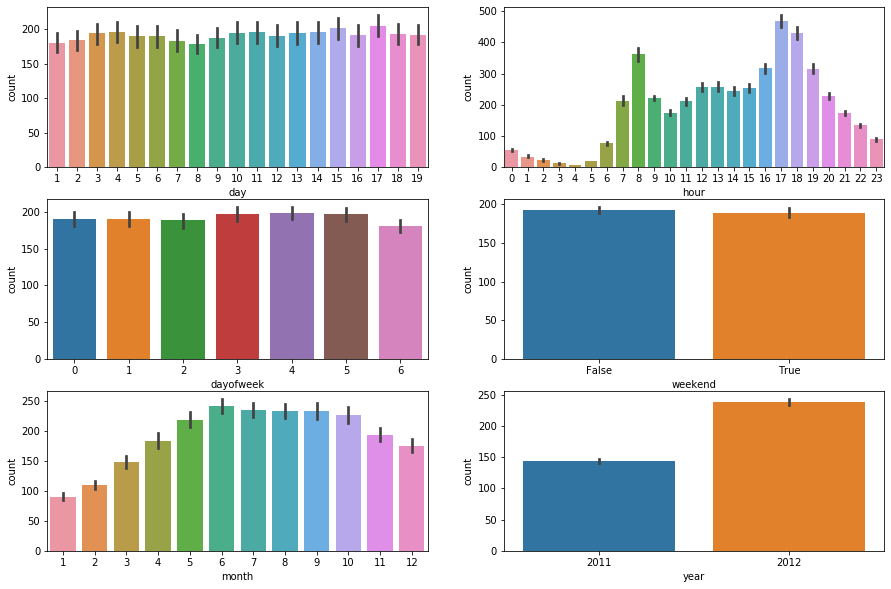

In [25]:
figure, axs = plt.subplots(3,2, figsize = (15,10))

sns.barplot(data=train, x = "day", y = target, ax = axs[0][0])
sns.barplot(data=train, x = "hour", y = target, ax = axs[0][1])
sns.barplot(data=train, x = "dayofweek", y = target, ax = axs[1][0])
sns.barplot(data=train, x = "weekend", y = target, ax = axs[1][1])
sns.barplot(data=train, x = "month", y = target, ax = axs[2][0])
sns.barplot(data=train, x = "year", y = target, ax = axs[2][1])

2012년도에 대여량이 늘어난 것을 볼 수 있습니다.

월별 대여량을 보면 여름에 대여량이 높은 것으로 볼 수 있습니다.

시간대별로는 출퇴근 시간에 대여량이 많은 것으로 보입니다.

월별과 일별 대여량은 별다른 특징이 없으므로 드롭해줍니다.

In [26]:
df=df.drop(columns=['month', 'day'])

In [27]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,dayofweek,year,weekend
0,1,0,0,1,9.84,14.395,81,0.0000,0,5,2011,True
1,1,0,0,1,9.02,13.635,80,0.0000,1,5,2011,True
2,1,0,0,1,9.02,13.635,80,0.0000,2,5,2011,True
3,1,0,0,1,9.84,14.395,75,0.0000,3,5,2011,True
4,1,0,0,1,9.84,14.395,75,0.0000,4,5,2011,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,0,2012,False
6489,1,0,1,2,10.66,12.880,60,11.0014,20,0,2012,False
6490,1,0,1,1,10.66,12.880,60,11.0014,21,0,2012,False
6491,1,0,1,1,10.66,13.635,56,8.9981,22,0,2012,False


season

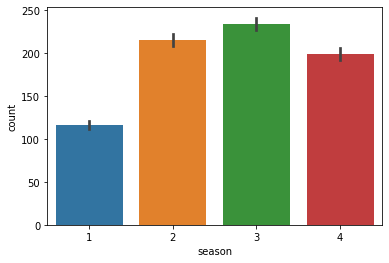

In [28]:
sns.barplot(data=df[:len(train)], x='season', y=target)

In [29]:
season_encoded = pd.get_dummies(df['season'],prefix= 'season')
df = pd.concat((df,season_encoded), axis=1)
df = df.drop(columns = 'season')

holiday

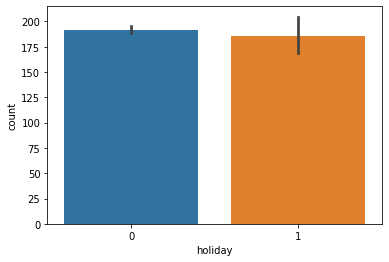

In [30]:
sns.barplot(data=df[:len(train)], x='holiday', y=target)

holiday 피처의 데이터로 보아서 카테고리 데이터로 봐야 할거같습니다.

In [31]:
df['holiday'] = df['holiday']

Workingday

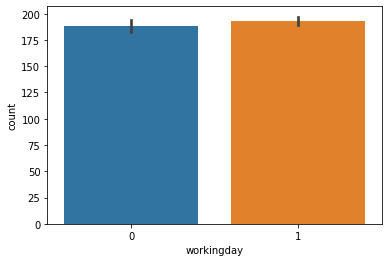

In [32]:
sns.barplot(data=df[:len(train)], x='workingday', y=target)

In [33]:
df['workingday'] = df['workingday']

workingday 피처의 데이터로 보아서 카테코리 데이터로 봐야할거 같습니다.

weather

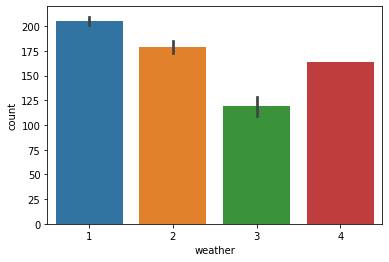

In [34]:
sns.barplot(data=df[:len(train)], x='weather', y=target)
df['weather'] = df['weather']

In [35]:
weather_encoded = pd.get_dummies(df['weather'],prefix= 'weather')
df = pd.concat((df,weather_encoded), axis=1)
df = df.drop(columns = 'weather')

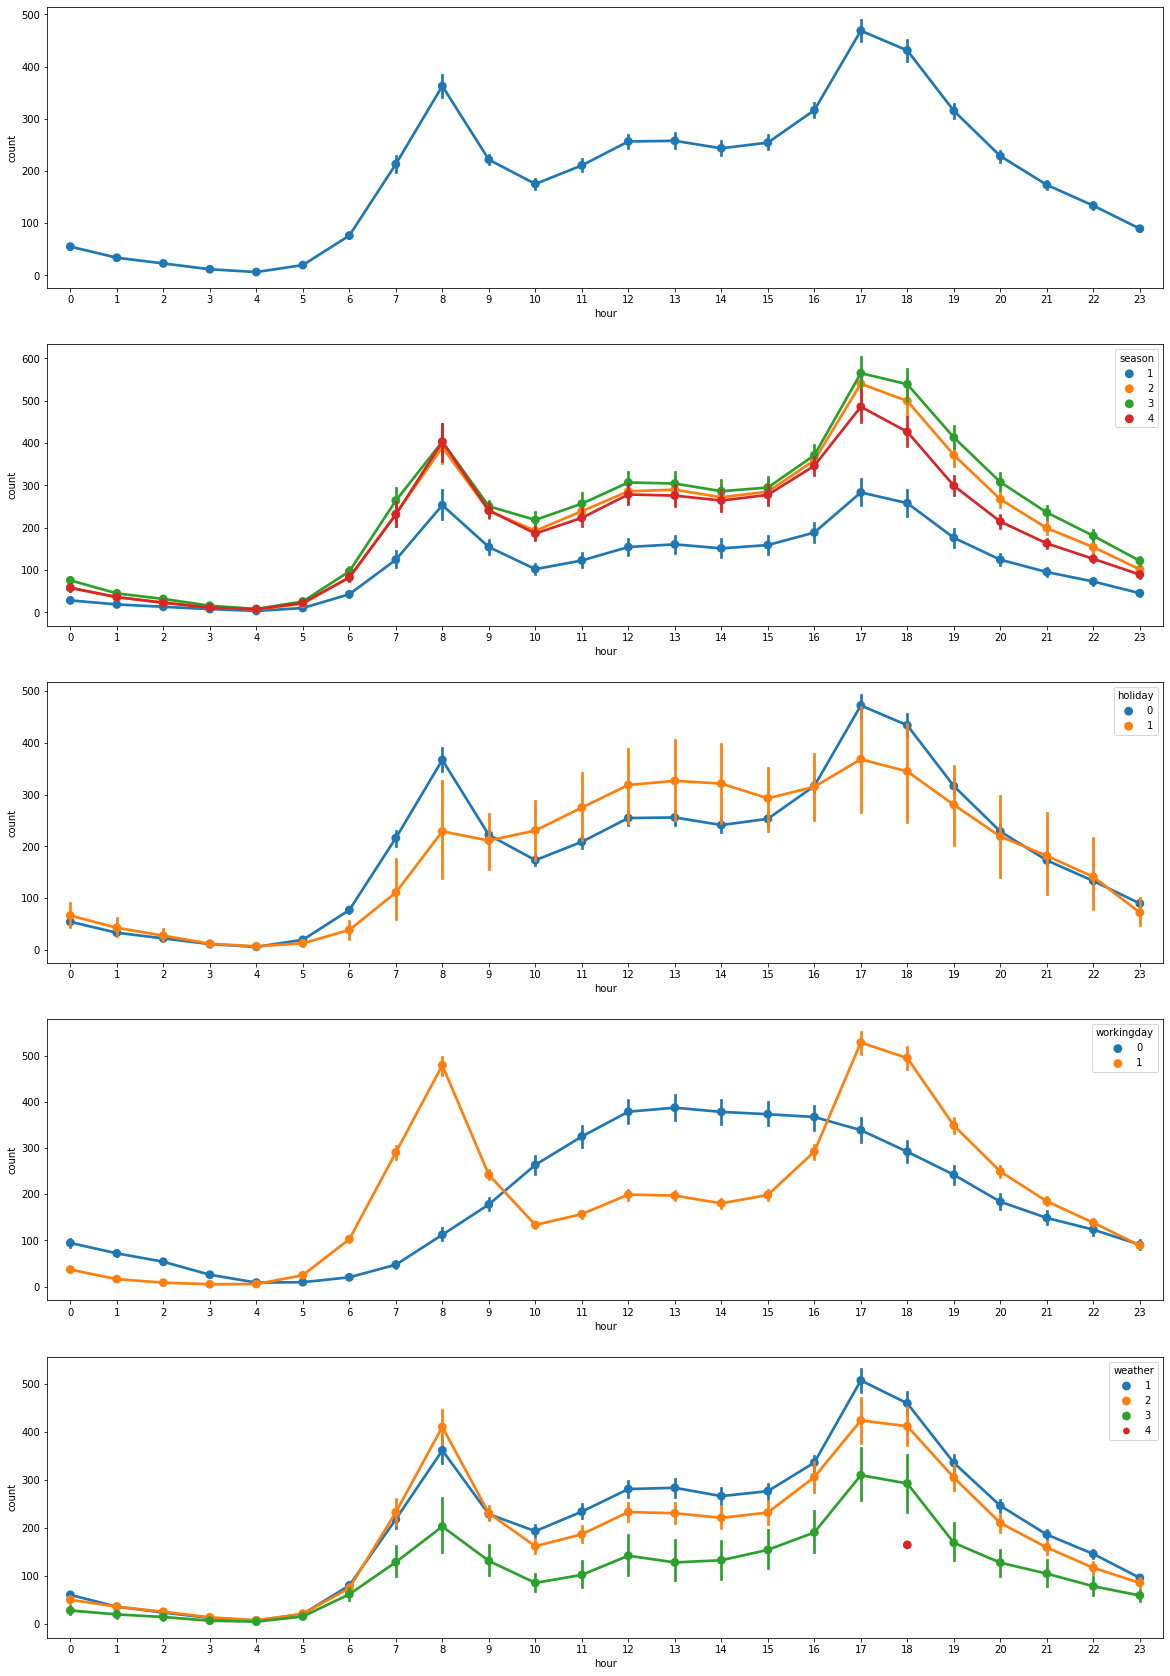

In [36]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(20,30)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)
sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax2)
sns.pointplot(data = train, x = "hour", y = "count", hue = "holiday", ax = ax3)
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax4)
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather",  ax = ax5)

변수들을 pointplot을 그려주었습니다.
첫번째 그래프는 출퇴근 시간에 대여량이 높은 것을 볼 수 있습니다.

두번째 그래프는 봄에 대여량이 낮을 것을 볼 수 있습니다.

세번째 그래프는 쉬는날에는 출퇴근 시간에도 대여량이 높지 않은 것을 볼 수 있습니다.

마지막 그래프는 맑은날 가장 높은 대여량을 보이며 날이 안좋을 때에는 대여량이 거의 없다고 봐도 될거같습니다.

왜도 확인

In [37]:
from scipy.stats import skew
skew = df.apply(lambda x: skew(x))
skew.sort_values(ascending = False)

weather_4     76.092051
holiday        5.638051
weather_3      3.055531
season_4       1.195185
season_1       1.191551
season_2       1.132099
season_3       1.102009
weather_2      1.085650
weekend        0.933592
windspeed      0.574856
temp          -0.006020
dayofweek     -0.009235
year          -0.010242
hour          -0.010679
atemp         -0.090421
humidity      -0.111278
weather_1     -0.660109
workingday    -0.785190
dtype: float64

In [38]:
skew = skew[abs(skew) > 0.5]
skew

holiday        5.638051
workingday    -0.785190
windspeed      0.574856
weekend        0.933592
season_1       1.191551
season_2       1.132099
season_3       1.102009
season_4       1.195185
weather_1     -0.660109
weather_2      1.085650
weather_3      3.055531
weather_4     76.092051
dtype: float64

상관분석

In [40]:
cor = train.iloc[:,1:-1].corr()
cor.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,day,hour,dayofweek,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.160452,0.001729,-0.006546,-0.010553,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.001231,-0.015877,-0.000354,-0.191832,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.015326,0.009829,0.002780,-0.704267,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.108005,-0.007890,-0.022740,-0.047692,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.376587,0.015551,0.145430,-0.038466,0.257589,0.061226


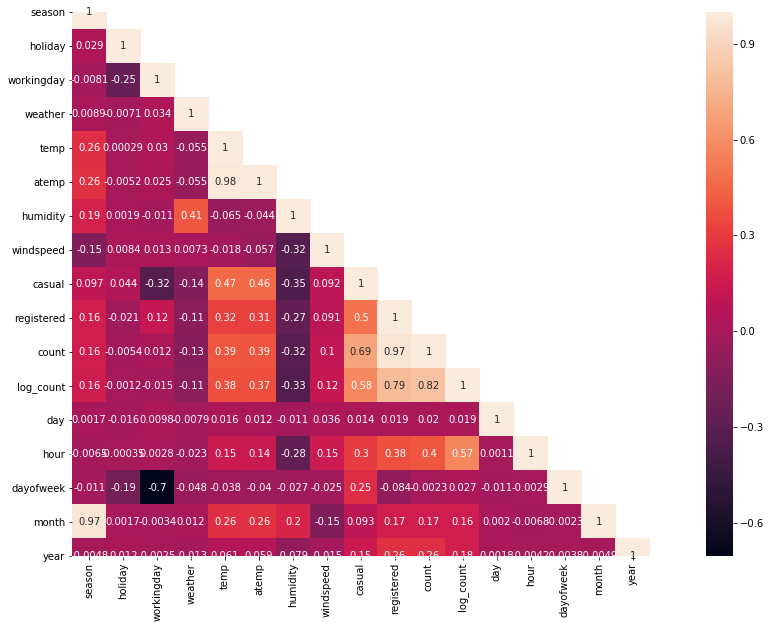

In [41]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor,mask= mask,square=True,annot=True)

temp와 humidity 피처 사이에 강한 상관관계를 가지고 있기 때문에 다중공선성을 확인해 봐야할거같다.
casual과 registered 피처는 누설변수 이기 때문에 고려하지 않는다.
타겟변수인 cout와 temp,humidity,windspeed를 고려해야 할거 같다.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif_data = df.iloc[:,:6]
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 6 columns):
holiday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
dtypes: float64(3), int64(3)
memory usage: 950.4 KB


In [44]:
vif = pd.DataFrame()
vif['Features'] = vif_data.columns
vif['vif'] = [variance_inflation_factor(
             vif_data.values, i) for i in range(vif_data.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
3,atemp,342.955195
2,temp,316.903766
4,humidity,6.362670
1,workingday,3.167607
5,windspeed,2.782781
0,holiday,1.085231


vif가 10이상이면 다중공선성이 존재한다고 하는데 atemp와 temp에 다중공선성 문제가 보임
주성분 분석으로 차원을 줄여보기로 함

In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(df[['temp', 'atemp']])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.explained_variance_ratio_

array([0.99388034])

In [47]:
df['pca']=pca.fit_transform(df[['temp','atemp']])

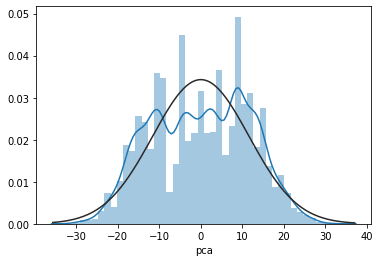

In [48]:
sns.distplot(df['pca'], fit=norm)

distplot 결과 파생변수인 pca는 정규분포를 따르고 있다고 본다.

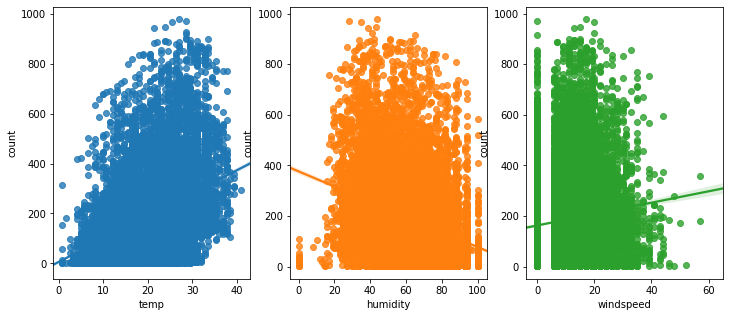

In [49]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3)
fig.set_size_inches(12,5)
sns.regplot(train['temp'], 'count', data = train, ax=ax1)
sns.regplot(train['humidity'], 'count', data = train, ax=ax2)
sns.regplot(train['windspeed'], 'count', data = train, ax=ax3)

In [50]:
stats.pearsonr(train['temp'],target)

(0.3944536449672491, 0.0)

세 변수 regplot을 확인해본 결과 windspeed의 경우 0쪽에 숫자가 몰려있는거 같다.

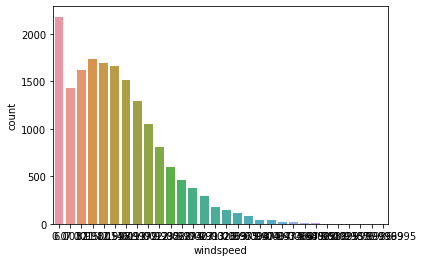

In [51]:
sns.countplot(data = df, x = "windspeed")

풍속의 경우 0에 데이터가 많이 몰려있는 것으로 보이므로 피처를 조정해 줘야 할 거 같다.

windspeed 데이터 예측

In [52]:
df.loc[df['windspeed']==0, 'windspeed']=df['windspeed'].mean()

RF를 통해서 풍속이 0인 구간을 예측하였으므로 앞에서 PCA를 했기 때문에 temp와 atemp 피처는 드롭하였다.

In [53]:
df = df.drop(columns=['temp','atemp'])

범주형 변수

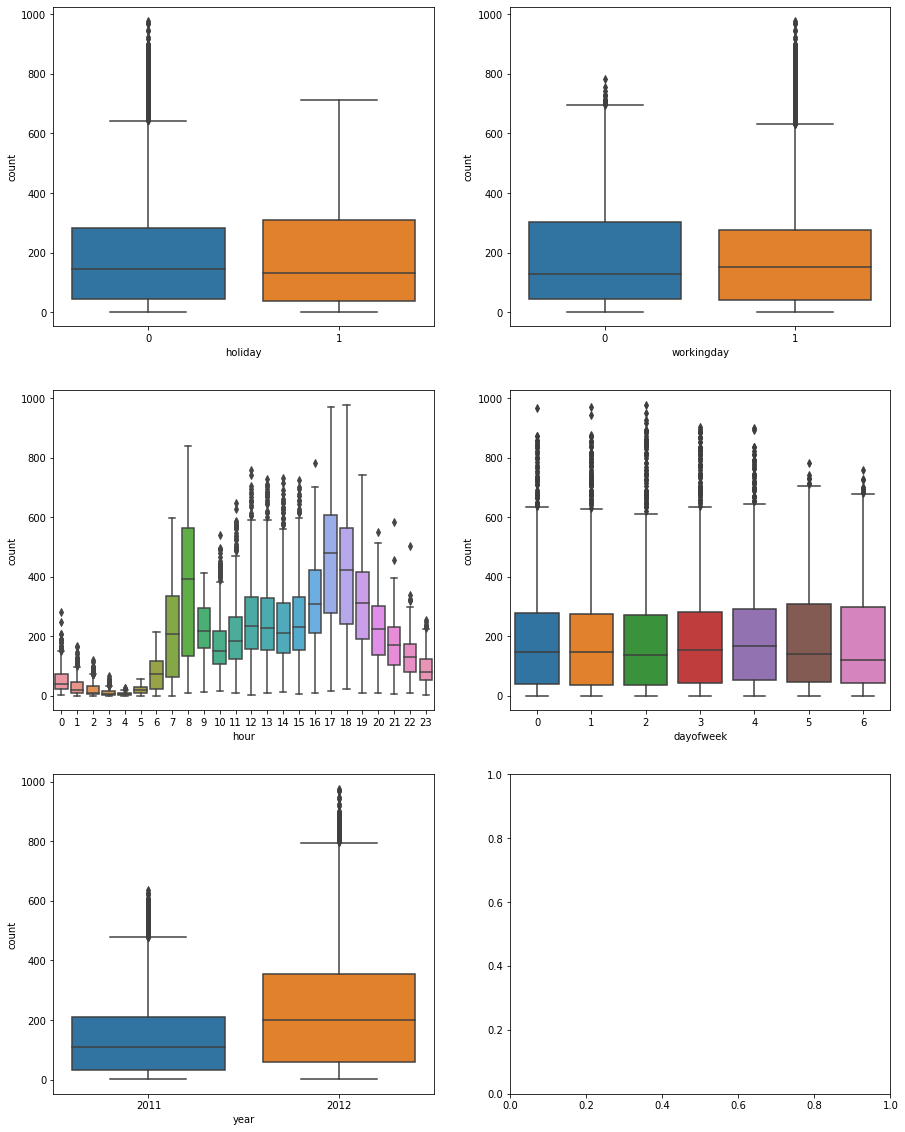

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15,20))
sns.boxplot(data = train, y="count", x = "holiday", orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y="count", x = "workingday", orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y="count", x = "hour", orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y="count", x = "dayofweek", orient = "v", ax = axes[1][1])
sns.boxplot(data = train, y="count", x = "year", orient = "v", ax = axes[2][0])

앞에서 보았던 특징들과 대부분 일치하는 특징을 보였다.

## 모델링

In [66]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

train_test_split

In [67]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [68]:
target = train['log_count']

In [76]:
X_train, X_val, y_train, y_val = train_test_split(new_train, target, test_size=0.2, shuffle=True)

검증을 하기 위해서 data 데이터를 train_test_split을 이용해서 trian과 validation으로 나누었다

RMSLE Score

In [77]:
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [78]:
from sklearn.metrics.scorer import make_scorer

RMSLE = make_scorer(rmsle_score)

단순선형회귀

In [79]:
import statsmodels.api as sm

In [80]:
model = sm.OLS(target.values, new_train.astype(float))

In [81]:
re = model.fit()

In [82]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     762.9
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        11:29:34   Log-Likelihood:                -15534.
No. Observations:               10886   AIC:                         3.110e+04
Df Residuals:                   10871   BIC:                         3.121e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday     -331.8891     15.729    -21.100      0.000    -362.721    -301.057
workingday  -331.9102     15.728    -21.103      0.000    -362.741    -301.080
humidity      -0.0135      0.001    -21.398      0.000      -0.015      -0.012
windspeed      0.0044      0.002      2.854      0.004       0.001       0.007
hour           0.0978      0.001     65.358      0.000       0.095       0.101
dayofweek      0.0329      0.008      4.070      0.000       0.017       0.049
year           0.4147      0.020     21.218      0.000       0.376       0.453
weekend     -331.9371     15.729    -21.104      0.000    -362.768    -301.106
season_1    -249.1264     11.798    -21.116      0.000    -272.253    -226.000
season_2    -248.9526     11.796    -21.105      0.000    -272.075    -225.830
season_3    -249.0760     11.795    -21.117      0.000    -272.196    -225.956
season_4    -248.5813     11.797    -21.071      0.000    -271.706    -225.456
weather_1   -249.1655     11.794    -21.126      0.000    -272.285    -226.046
weather_2   -249.0204     11.795    -21.112      0.000    -272.141    -225.900
weather_3   -249.3972     11.795    -21.144      0.000    -272.517    -226.277
weather_4   -248.1533     11.834    -20.969      0.000    -271.350    -224.956
pca            0.0390      0.001     27.368      0.000       0.036       0.042
==============================================================================
Omnibus:                      117.783   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.440
Skew:                          -0.259   Prob(JB):                     4.26e-27
Kurtosis:                       3.017   Cond. No.                     1.55e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

모델의 설명력이 낮으며 p-value가 높은 값들이 존재하며 다중공선성의 문제가 있을 수 도 있다.

Lasso

In [83]:
param = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

In [84]:
lasso = make_pipeline(GridSearchCV(Lasso(random_state=1),param,
                                  cv=10, scoring = RMSLE))

In [85]:
lasso.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=1,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                              iid='warn', n_jobs=None,
                              param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.8,
                                                    1],
                                          'normalize': [True, False],
                                          'tol': [1e-06, 1e-05, 5e-05, 0.0001,
                                                  0.0005, 0.001]},
               

In [86]:
la_yhat = lasso.predict(X_val)

In [87]:
s_lasso = rmsle_score(la_yhat,y_val)
s_lasso

0.3232985893077126

In [88]:
pred_la = lasso.predict(new_test)

ElasticNet

In [89]:
param_e = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
           'normalize':[True,False]}

In [90]:
Enet = make_pipeline(GridSearchCV(ElasticNet(random_state=1),param_e,
                     cv=10, scoring = RMSLE))

In [91]:
Enet.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=1,
                                                   selection='cyclic',
                                                   tol=0.0001,
                                                   warm_start=False),
                              iid='warn', n_jobs=None,
                              param_grid={'alpha': [0.1, 1.0, 10],
                                          'l1_ratio'

In [92]:
Enet_yhat = Enet.predict(X_val)

In [93]:
s_Enet = rmsle_score(Enet_yhat,y_val)
s_Enet

0.3232985893077126

In [94]:
pred_Enet = Enet.predict(new_test)

RandomForestRegressor

In [95]:
param_Rf =  {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }

In [96]:
RF = make_pipeline(GridSearchCV(RandomForestRegressor(random_state=1),param_Rf,
                   cv=10, scoring = RMSLE))

In [97]:
RF.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                         

In [98]:
RF_yhat = RF.predict(X_val)
s_RF = rmsle_score(RF_yhat,y_val)
s_RF

0.08345633062361249

In [99]:
pred_RF = RF.predict(new_test)

GradientBoostingRegressor

In [100]:
param_GB = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000]}]

In [101]:
GB = make_pipeline(GridSearchCV(GradientBoostingRegressor(random_state=1),param_GB,
                   cv=10, scoring = RMSLE))

In [102]:
GB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=GradientBoostingRegressor(alpha=0.9,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=None,
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                

In [103]:
GB_yhat = GB.predict(X_val)
s_GB = rmsle_score(GB_yhat,y_val)
s_GB

0.31466806568285866

In [104]:
pred_GB = GB.predict(new_test)

XGBRegressor

xgb의 경우 라벨인코더로 예측할수 있지만 성능이 떨어지므로 모델링을 하지 않기로 했다.

In [115]:
param_xgb = [{'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}]

In [116]:
xgb = make_pipeline(GridSearchCV(XGBRegressor(silent=True,random_state=1),param_xgb,
                    cv=10, scoring = RMSLE))

In [117]:
xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0,
                                                     importance_type='gain',
                                                     learning_rate=0.1,
                                                     max_delta_step=0,
                                                     max_depth=3,
                                                     min_child_weight=1,
                                                     missing=None,
                           

In [118]:
xgb_yhat = xgb.predict(X_val)
s_xgb = rmsle_score(xgb_yhat,y_val)
s_xgb

1.1811124631108023

In [119]:
pred_xgb = xgb.predict(new_test)

LGBMRegressor

In [105]:
param_lgb = param_grid = [{
    'n_estimators': [400, 700, 1000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}]

In [106]:
lgb = make_pipeline(GridSearchCV(LGBMRegressor(verbose_eval=False,random_state=1),param_lgb,
                    cv=10, scoring = RMSLE))

In [107]:
lgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=LGBMRegressor(boosting_type='gbdt',
                                                      class_weight=None,
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                  

In [108]:
lgb_yhat = lgb.predict(X_val)
s_lgb = rmsle_score(lgb_yhat,y_val)
s_lgb

0.08392102336325613

In [109]:
pred_lgb = lgb.predict(new_test)

In [110]:
list_scores = [s_lasso, s_Enet, s_RF,s_GB,s_lgb]
list_regressors = ['Lasso','Enet','RF','GB','lgb']

Text(0, 0.5, 'RMSE')

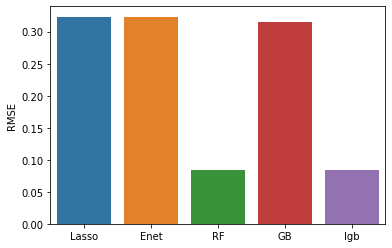

In [111]:
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('RMSE')

앙상블

In [112]:
predictions = {'Lasso': pred_la,
               'ElaNet': pred_Enet, 
               'RF': pred_RF,
               'GB': pred_GB,
               #'XGB' : pred_xgb,
               'lgb' : pred_lgb
              }

In [113]:
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

,Lasso,ElaNet,RF,GB,lgb
Lasso,1.000000e+00,1.000000e+00,1.793056e-15,1.633712e-12,5.917300e-15
ElaNet,1.000000e+00,1.000000e+00,1.793056e-15,1.633712e-12,5.917300e-15
RF,1.793056e-15,1.793056e-15,1.000000e+00,8.861086e-01,9.944060e-01
GB,1.633712e-12,1.633712e-12,8.861086e-01,1.000000e+00,8.873204e-01
lgb,5.917300e-15,5.917300e-15,9.944060e-01,8.873204e-01,1.000000e+00


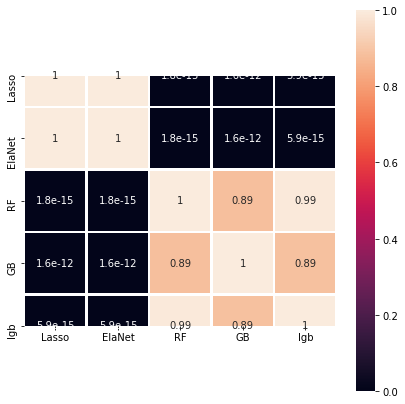

In [114]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_predictions.corr(),linewidths=1.5,
            annot=True, 
            square=True,          
            yticklabels=df_predictions.columns , 
            xticklabels=df_predictions.columns)


lgb모델과 RF모델이 상관관계가 높게 나오므로 앙상블을 통해 예측을 하기로 한다.

## Pred

RF 모델 예측

In [120]:
RF.fit(new_train,target)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                         

In [121]:
log_pred=RF.predict(new_test)
predictions=np.exp(log_pred)-1

In [122]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = predictions
sub.head()

,datetime,count
0,2011-01-20 00:00:00,13.000867
1,2011-01-20 01:00:00,4.656360
2,2011-01-20 02:00:00,2.925190
3,2011-01-20 03:00:00,3.110998
4,2011-01-20 04:00:00,2.557770


In [123]:
sub.to_csv('submission.csv', index=False)

이 경우 RMSE score가 0.39182가 나왔습니다.

lgb 모델 예측

In [126]:
lgb.fit(new_train,target)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=LGBMRegressor(boosting_type='gbdt',
                                                      class_weight=None,
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                  

In [127]:
log_pred_lgb=lgb.predict(new_test)
predictions_lgb=np.exp(log_pred_lgb)-1

In [128]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = predictions_lgb
sub.head()

,datetime,count
0,2011-01-20 00:00:00,10.556054
1,2011-01-20 01:00:00,4.497898
2,2011-01-20 02:00:00,2.957088
3,2011-01-20 03:00:00,2.412372
4,2011-01-20 04:00:00,2.231999


이 경우 RMSE score가 0.39461가 나왔습니다.

In [144]:
ensemble = (0.6*predictions + 0.4*predictions_lgb) 

In [145]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = ensemble
sub.head()

,datetime,count
0,2011-01-20 00:00:00,12.022942
1,2011-01-20 01:00:00,4.592975
2,2011-01-20 02:00:00,2.937949
3,2011-01-20 03:00:00,2.831547
4,2011-01-20 04:00:00,2.427462


In [146]:
sub.to_csv('submission.csv', index=False)

앙상블로 모델을 만들어 예측 결과 RMSE score가 0.38762 나왔습니다.